In [1]:
import tensorflow as tf
import os
import zipfile
from os import path, getcwd, chdir


In [2]:
base_dir = r'C:\Users\shive\OneDrive\Desktop'
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')

train_organic_dir = os.path.join(train_dir, 'O')
train_inorganic_dir = os.path.join(train_dir, 'R')


validation_organic_dir = os.path.join(validation_dir, 'O')
validation_dogs_dir = os.path.join(validation_dir, 'R')

In [3]:
train_organic_fnames = os.listdir( train_organic_dir )
train_inorganic_fnames = os.listdir( train_inorganic_dir )

print(train_organic_fnames[:10])
print(train_inorganic_fnames[:10])


['O_1.jpg', 'O_10.jpg', 'O_100.jpg', 'O_1000.jpg', 'O_10000.jpg', 'O_10001.jpg', 'O_10002.jpg', 'O_10003.jpg', 'O_10004.jpg', 'O_10005.jpg']
['R_1.jpg', 'R_10.jpg', 'R_100.jpg', 'R_1000.jpg', 'R_1001.jpg', 'R_1002.jpg', 'R_1003.jpg', 'R_1004.jpg', 'R_1005.jpg', 'R_1006.jpg']


In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


nrows = 4
ncols = 4

pic_index = 0 

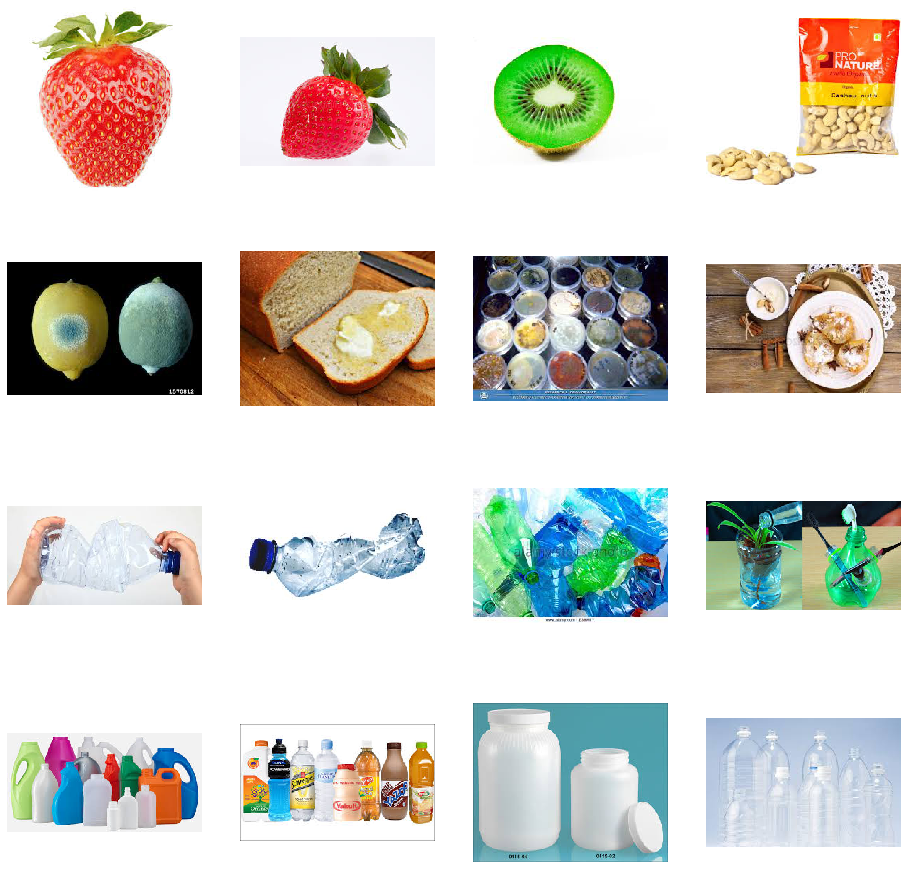

In [5]:

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_organic_dir, fname) 
                for fname in train_organic_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_inorganic_dir, fname) 
                for fname in train_inorganic_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
 
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [6]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
    
        tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
    
        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
    
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
    
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [23]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255
                                  )

test_datagen  = ImageDataGenerator( rescale = 1.0/255
                                  )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [25]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            if logs.get('accuracy')>0.90:
                print('Reached 90% accuracy so cancelling training!')
                self.model.stop_training=True

In [28]:
callbacks=myCallback()
from IPython.display import display
from PIL import Image


history = model.fit(train_generator,
                    epochs=4,
                    steps_per_epoch=100,
                    validation_data=validation_generator,
                    callbacks=[callbacks]
                   )

Epoch 1/4
100/100 [==============================] - 49s 489ms/step - loss: 0.3097 - accuracy: 0.8810 - val_loss: 0.2966 - val_accuracy: 0.8894
Epoch 2/4
100/100 [==============================] - 49s 489ms/step - loss: 0.3025 - accuracy: 0.8800 - val_loss: 0.3081 - val_accuracy: 0.8786
Epoch 3/4
100/100 [==============================] - 49s 491ms/step - loss: 0.3315 - accuracy: 0.8720 - val_loss: 0.2914 - val_accuracy: 0.8890
Epoch 4/4
100/100 [==============================] - 49s 489ms/step - loss: 0.3027 - accuracy: 0.8780 - val_loss: 0.2729 - val_accuracy: 0.8953


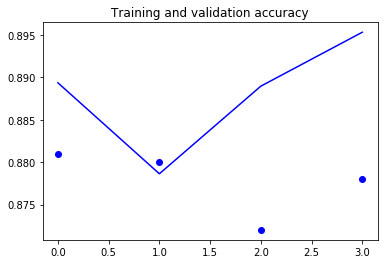

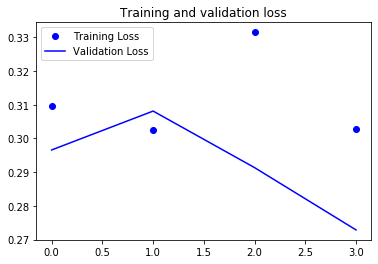

In [29]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')

plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [44]:
path=r'C:\Users\shive\OneDrive\Desktop'
uploaded=os.path.join(path,'Organic and inorganic waste')
names=os.listdir(uploaded)
print(names)

['1-3.jpg', 'download (1).jpg', 'download (2).jpg', 'download.jpg', 'ImageForArticle_913(1).jpg']


In [45]:
from tensorflow.keras.preprocessing import image
import numpy as np


for name in names:
    str=r'C:\Users\shive\OneDrive\Desktop\Organic and inorganic waste'
    str=str+'\\'+name






    img=image.load_img(str,target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(name,' is predicted as: ',end="")
    if classes[0]==0:
        print('organic')
    else:
        print('inorganic')

1-3.jpg  is predicted as: organic
download (1).jpg  is predicted as: organic
download (2).jpg  is predicted as: inorganic
download.jpg  is predicted as: organic
ImageForArticle_913(1).jpg  is predicted as: inorganic
